# Fluid-structure interaction

This example originates from the GitHub repository maintained by Professor Quan Gu of Xiamen University. 
Refer to: [OpenSeesXMU](https://github.com/OpenSeesXMU/A-practical-guide-to-OpenSees---examples/tree/master/Chapter07--Fluid-solid%20coupling)

In [1]:
import matplotlib.pyplot as plt
import openseespy.opensees as ops

import opstool as opst


In [2]:
ops.wipe()
ops.model("basic", "-ndm", 3, "-ndf", 3)
ops.node(1, 1.0, 0.0, 0.0)
ops.node(2, 1.0, 1.0, 0.0)
ops.node(3, 0.0, 1.0, 0.0)
ops.node(4, 0.0, 0.0, 0.0)
ops.node(5, 1.0, 0.0, 1.0)
ops.node(6, 1.0, 1.0, 1.0)
ops.node(7, 0.0, 1.0, 1.0)
ops.node(8, 0.0, 0.0, 1.0)

In [3]:
ops.nDMaterial("TruncatedDP", 1, 3, 2400000, 14957000000.0, 17677000000.0, 0.11, 26614000.0, -2068400.0)
ops.element("bbarBrick", 1, 1, 2, 3, 4, 5, 6, 7, 8, 1, 0, 0, -23520000.0)

LinearCap nDmaterial - Written: Quan Gu and Zhijian Qiu 


In [4]:
ops.element("VS3D4", 5, 3, 4, 8, 7, 25000000000.0, 100000000000.0, 2600, 475, 1.33, 0.67)
ops.element("VS3D4", 6, 1, 2, 6, 5, 25000000000.0, 100000000000.0, 2600, 475, 1.33, 0.67)
ops.element("VS3D4", 7, 1, 2, 3, 4, 25000000000.0, 100000000000.0, 2600, 475, 1.33, 0.67)
ops.element("VS3D4", 8, 1, 5, 8, 4, 25000000000.0, 100000000000.0, 2600, 475, 1.33, 0.67)

In [5]:
ops.model("basic", "-ndm", 3, "-ndf", 1)
ops.node(9, 1.0, 1.0, 0.0)
ops.node(10, 1.0, 2.0, 0.0)
ops.node(11, 0.0, 2.0, 0.0)
ops.node(12, 0.0, 1.0, 0.0)
ops.node(13, 1.0, 1.0, 1.0)
ops.node(14, 1.0, 2.0, 1.0)
ops.node(15, 0.0, 2.0, 1.0)
ops.node(16, 0.0, 1.0, 1.0)
ops.nDMaterial("AcousticMedium", 2, 2070000000.0, 1000)
ops.element("AC3D8", 3, 9, 10, 11, 12, 13, 14, 15, 16, 2)
ops.element("ASI3D8", 2, 2, 3, 6, 7, 9, 12, 13, 16)
ops.element("AV3D4", 4, 10, 11, 15, 14, 2)
ops.fix(13, 1)
ops.fix(14, 1)
ops.fix(15, 1)
ops.fix(16, 1)

In [6]:
fig = opst.vis.plotly.plot_model()
fig.write_html("model.html", full_html=False, include_plotlyjs="cdn")
fig.show()

In [7]:
ops.timeSeries("Path", 1, "-dt", 0.01, "-filePath", "elcentro.txt", "-factor", 3)
ops.pattern("Plain", 111, 1)
ops.load(1, 1000000.0, 0, 1000000.0)
ops.load(2, 1000000.0, 0, 1000000.0)
ops.load(3, 1000000.0, 0, 1000000.0)
ops.load(4, 1000000.0, 0, 1000000.0)

In [8]:
ops.wipeAnalysis()
ops.constraints("Transformation")
ops.system("BandGeneral")
ops.numberer("Plain")
ops.test("NormDispIncr", 1e-05, 20, 0)
ops.algorithm("Newton")
ops.integrator("Newmark", 0.5, 0.25)
ops.analysis("Transient")

In [9]:
ODB = opst.post.CreateODB(odb_tag="FSI", project_gauss_to_nodes="copy")

N = 1600
for i in range(N):
    ops.analyze(1, 0.01)
    ODB.fetch_response_step()
ODB.save_response()
ops.wipeAnalysis()
print("Dynamic analysi done...")

OPSTOOL ::  All responses data with _odb_tag = FSI saved in .opstool.output/RespStepData-FSI.nc!

Dynamic analysi done...


In [10]:
node_resp = opst.post.get_nodal_responses(odb_tag="FSI")

OPSTOOL ::  Loading all response data from .opstool.output/RespStepData-FSI.nc ...

In [11]:
node5_resp = node_resp.sel(nodeTags=5)
node6_resp = node_resp.sel(nodeTags=6)

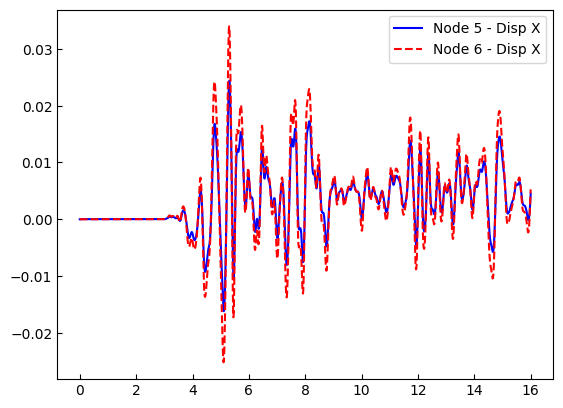

In [12]:
plt.plot(node5_resp.time, node5_resp["disp"].sel(DOFs="UX"), "b-", label="Node 5 - Disp X")
plt.plot(node6_resp.time, node6_resp["disp"].sel(DOFs="UX"), "r--", label="Node 6 - Disp X")
plt.legend()
plt.show()

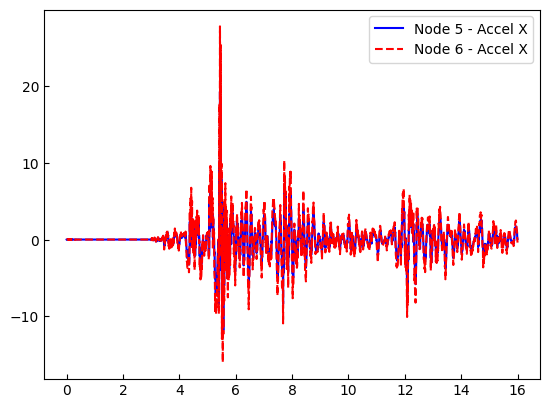

In [13]:
plt.plot(node5_resp.time, node5_resp["accel"].sel(DOFs="UX"), "b-", label="Node 5 - Accel X")
plt.plot(node6_resp.time, node6_resp["accel"].sel(DOFs="UX"), "r--", label="Node 6 - Accel X")
plt.legend()
plt.show()

In [14]:
opst.post.get_element_responses(odb_tag="FSI", ele_type="Brick")

OPSTOOL ::  Loading Brick response data from .opstool.output/RespStepData-FSI.nc ...

<xarray.Dataset> Size: 5MB
Dimensions:                (time: 1601, eleTags: 2, GaussPoints: 8,
                            stressDOFs: 6, strainDOFs: 6, nodeTags: 8,
                            measures: 7)
Coordinates:
  * time                   (time) float32 6kB 0.0 0.01 0.02 ... 15.98 15.99 16.0
  * eleTags                (eleTags) int32 8B 1 3
  * GaussPoints            (GaussPoints) int32 32B 1 2 3 4 5 6 7 8
  * stressDOFs             (stressDOFs) <U7 168B 'sigma11' ... 'sigma13'
  * strainDOFs             (strainDOFs) <U5 120B 'eps11' 'eps22' ... 'eps13'
  * nodeTags               (nodeTags) int32 32B 1 2 3 4 5 6 7 8
  * measures               (measures) <U9 252B 'p1' 'p2' ... 'tau_oct'
Data variables:
    Stresses               (time, eleTags, GaussPoints, stressDOFs) float32 615kB ...
    Strains                (time, eleTags, GaussPoints, strainDOFs) float32 615kB ...
    StressesAtNodes        (time, nodeTags, stressDOFs) float32 307kB 0.0 ......
    StrainsAtNodes         (time, nodeTags, strainDOFs) float32 307kB 0.0 ......
    StressAtNodesErr       (time, nodeTags, stressDOFs) float32 307kB 0.0 ......
    StrainsAtNodesErr      (time, nodeTags, strainDOFs) float32 307kB 0.0 ......
    StressMeasures         (time, eleTags, GaussPoints, measures) float32 717kB ...
    StrainMeasures         (time, eleTags, GaussPoints, measures) float32 717kB ...
    StressMeasuresAtNodes  (time, nodeTags, measures) float32 359kB 0.0 ... 3...
    StrainMeasuresAtNodes  (time, nodeTags, measures) float32 359kB 0.0 ... 0...
Attributes:
    sigma11, sigma22, sigma33:  Normal stress (strain) along x, y, z.
    sigma12, sigma23, sigma13:  Shear stress (strain).
    p1, p2, p3:                 Principal stresses (strains).
    eta_r:                      Ratio between the shear (deviatoric) stress a...
    sigma_vm:                   Von Mises stress.
    tau_max:                    Maximum shear stress (strains).
    sigma_oct:                  Octahedral normal stress (strains).
    tau_oct:                    Octahedral shear stress (strains).